# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow  opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow_gpu-2.10.0 (from versions: none)
ERROR: No matching distribution found for tensorflow_gpu-2.10.0
You should consider upgrading via the 'C:\Users\ramra\OneDrive - Chandigarh University\Desktop\ImageClassification-main\image\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip install tensorflow-gpu==2.10.0

^C


In [ ]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.3.3
fonttools                    4.39.3
gast                         0.4.0
google-auth                  2.17.1
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.53.0
h5py                         3.8.0
idna                         3.4
importlib-metadata           6.1.0
importlib-resources          5.12.0
ipykernel                    6.22.0
ipyth

You should consider upgrading via the 'C:\Users\ramra\OneDrive - Chandigarh University\Desktop\ImageClassification-main\image\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached protobuf-4.22.1-cp39-cp39-win_amd64.whl (420 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.8.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached grpcio-1.53.0-cp39-cp39-win_amd64.whl (4.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estima

You should consider upgrading via the 'C:\Users\ramra\OneDrive - Chandigarh University\Desktop\ImageClassification-main\image\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'signatures' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('signatures')

Found 2640 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

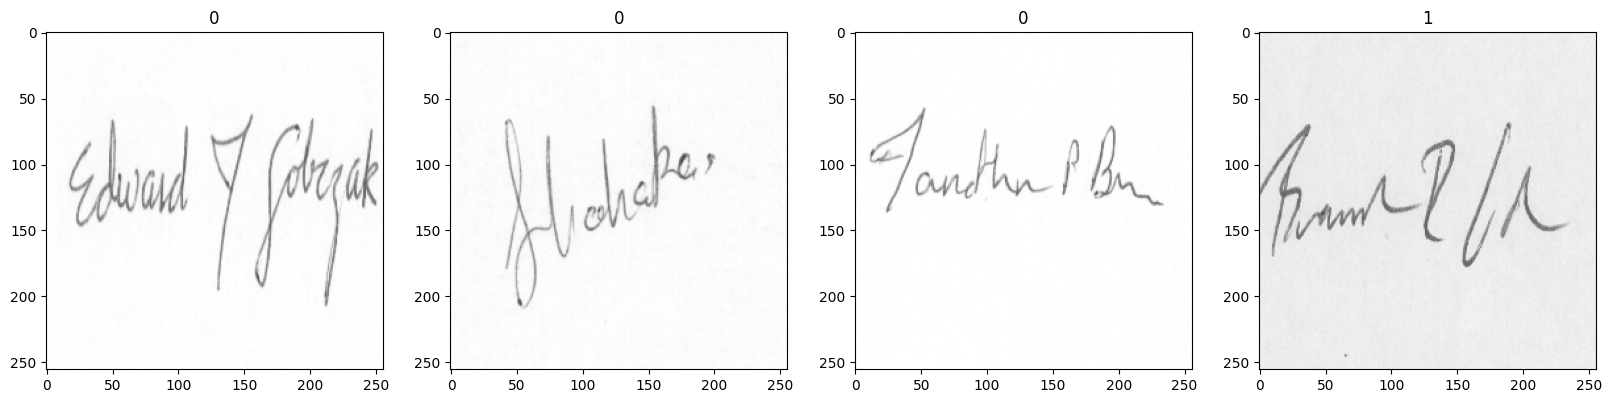

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.943001  , 0.943001  , 0.943001  ],
          [0.9162409 , 0.9162409 , 0.9162409 ],
          [0.93583053, 0.93583053, 0.93583053],
          ...,
          [0.9455729 , 0.9455729 , 0.9455729 ],
          [0.9404457 , 0.9404457 , 0.9404457 ],
          [0.9454182 , 0.9454182 , 0.9454182 ]],
 
         [[0.92836696, 0.92836696, 0.92836696],
          [0.9270218 , 0.9270218 , 0.9270218 ],
          [0.9333868 , 0.9333868 , 0.9333868 ],
          ...,
          [0.9294349 , 0.9294349 , 0.9294349 ],
          [0.9374633 , 0.9374633 , 0.9374633 ],
          [0.9380623 , 0.9380623 , 0.9380623 ]],
 
         [[0.93540925, 0.93540925, 0.93540925],
          [0.9300783 , 0.9300783 , 0.9300783 ],
          [0.93059057, 0.93059057, 0.93059057],
          ...,
          [0.94822305, 0.94822305, 0.94822305],
          [0.9415445 , 0.9415445 , 0.9415445 ],
          [0.9269378 , 0.9269378 , 0.9269378 ]],
 
         ...,
 
         [[0.9417127 , 0.9417127 , 0.9417127 ],
          [0.92209

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

58

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7
58/58 [==============================] - 11s 89ms/step - loss: 0.7211 - accuracy: 0.5226 - val_loss: 0.6906 - val_accuracy: 0.6953
Epoch 2/7
58/58 [==============================] - 5s 89ms/step - loss: 0.6164 - accuracy: 0.6713 - val_loss: 0.6364 - val_accuracy: 0.6426
Epoch 3/7
58/58 [==============================] - 5s 88ms/step - loss: 0.5377 - accuracy: 0.7268 - val_loss: 0.5225 - val_accuracy: 0.7441
Epoch 4/7
58/58 [==============================] - 5s 88ms/step - loss: 0.4329 - accuracy: 0.8012 - val_loss: 0.4349 - val_accuracy: 0.8086
Epoch 5/7
58/58 [==============================] - 5s 88ms/step - loss: 0.3711 - accuracy: 0.8341 - val_loss: 0.5263 - val_accuracy: 0.7461
Epoch 6/7
58/58 [==============================] - 5s 87ms/step - loss: 0.3165 - accuracy: 0.8642 - val_loss: 0.5279 - val_accuracy: 0.7715
Epoch 7/7
58/58 [==============================] - 5s 88ms/step - loss: 0.2444 - accuracy: 0.8992 - val_loss: 0.4278 - val_accuracy: 0.8262


# 8. Plot Performance

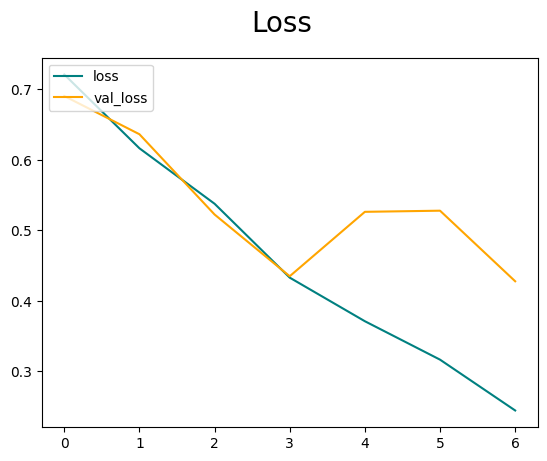

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

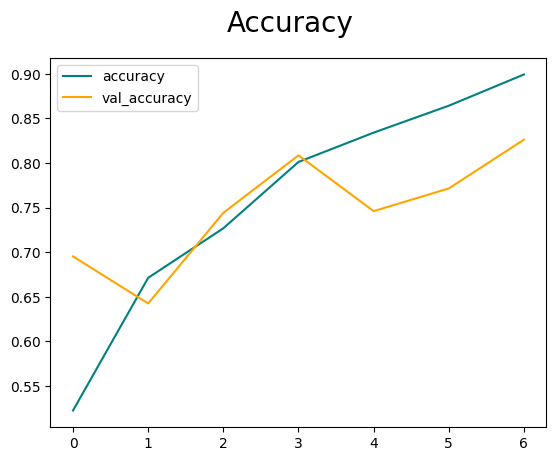

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 32ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.853211, shape=(), dtype=float32) tf.Tensor(0.6838235, shape=(), dtype=float32) tf.Tensor(0.76953125, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2
import matplotlib.pyplot as plt


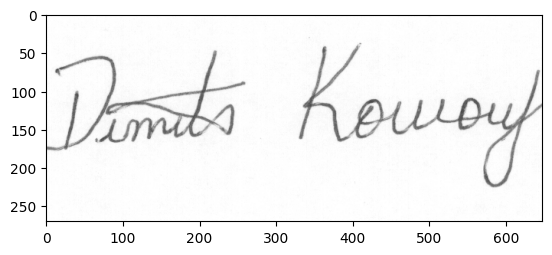

In [34]:
img = cv2.imread('signatures/full_forg/forgeries_13_22.png')
plt.imshow(img)
plt.show()

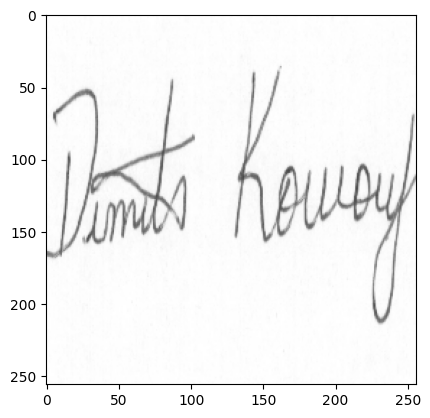

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 421ms/step


In [37]:
yhat

array([[0.01623424]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is original')
else:
    print(f'Predicted class is forged')

Predicted class is forged


# 11. Save the Model

In [123]:
from tensorflow.keras.models import load_model

In [124]:
model.save(os.path.join('models','imageclassifier.h5'))

In [126]:
new_model = load_model('models/imageclassifier.h5')

In [127]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


array([[0.33958346]], dtype=float32)